# Project 1: Credit Card Fraud Detection
The total score for this project is 35. It will contribute 10 out of 100 in our final score. The tentative deadline for the assignment will be April 5th, 9:00 pm.

In [ ]:
from google.colab import files
upload = files.upload()

In [32]:
#####################################################
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
#####################################################

In [53]:
#Importing data 
df1 = pd.read_csv("creditcardSubset.csv")
df1.head()
### ToDO:
## Remove the Time feature
## 2 points


,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,266085,162183.0,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,...,0.197782,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,2.99,0
1,172120,120967.0,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,...,-0.336497,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,1.98,0
2,15136,26484.0,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,...,1.371671,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,1937.66,0
3,96393,65751.0,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,...,-0.065082,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,320.05,0
4,208225,137025.0,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,...,0.008303,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,11.50,0


In [56]:
df= df1.drop(columns=['Time','Unnamed: 0'], axis = 1)

In [17]:
!pip install termcolor

In [57]:
#### Exploratory Data Analysis
### ToDO:
## 2 points
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class ==  1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

from termcolor import colored as cl # text customization
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 9021
Number of Non-fraud cases are 8529
Number of Non-fraud cases are 492
Percentage of fraud cases is 5.77
--------------------------------------------


In [58]:
###################################################
## Training and Testing Data Split
X = df.drop('Class', axis = 1).values
y = df['Class'].values

### ToDO:
## 2 points
## Use test_size as 0.2
X_train, X_test, y_train, y_test = train_test_split( X,  y, test_size =.2 , random_state = 0)

In [59]:
## Model Fitting Process
# Fit a  Logistic Regression as baseline
# once fit the model, make predictions using
# testing dataset X_test
### ToDO:
## 3 points
lr = LogisticRegression()
lr.fit(X_train ,y_train )
lr_ypred = lr.predict(X_test)

c:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
## Model Fitting Process
# Fit a Decision Tree Model
# once fit the model, make predictions using
# testing dataset X_test
### ToDO:
## 3 points
## use criterion="gini"
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_ypred = tree_model.predict(X_test)

In [61]:
## Fit a Random Forest and make predictions using X_test
### ToDO:
## 3 points
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_ypred = rf.predict(X_test)

In [62]:
### Model Evaluation Process
### Using Classification Report
from sklearn.metrics import classification_report
#print(classification_report(y_test, tree_ypred))
## To learn about ROC and AUC, you can read
## the tutorial here: 
## https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

### Using Confusion Matrix
# helper function
## add true and predicted in the x and y axis
def plot_confusionmatrix(y_train_pred,y_train,dom, classes):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99      1700
       Fraud       0.99      0.82      0.90       105

    accuracy                           0.99      1805
   macro avg       0.99      0.91      0.94      1805
weighted avg       0.99      0.99      0.99      1805

Test Confusion matrix


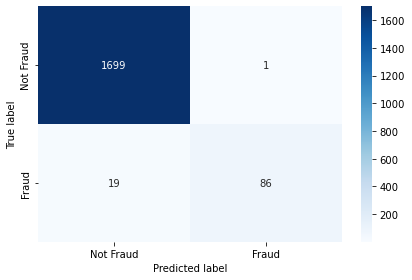

c:\Users\student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


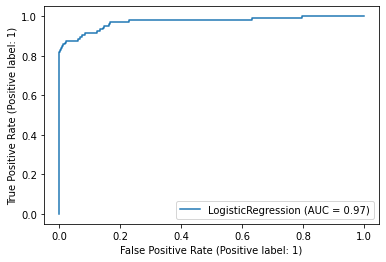

In [63]:
## Evaluate baseline Logistic Regression Model
classes =['Not Fraud', 'Fraud']
### ToDO: 
### 3 points

## get classification_report for the logistic regression
## predictions with the ground truth label for the testing dataset 
print(classification_report(y_test, lr_ypred, target_names=classes))

### plot the confusion matrix of the prediction labels with the
### ground truth label for the testing dataset
plot_confusionmatrix(lr_ypred,y_test,dom='Test',classes=classes)
plot_roc_curve(lr,X_test,y_test)


              precision    recall  f1-score   support

   Not Fraud       0.99      0.99      0.99      1700
       Fraud       0.84      0.83      0.84       105

    accuracy                           0.98      1805
   macro avg       0.92      0.91      0.91      1805
weighted avg       0.98      0.98      0.98      1805

Test Confusion matrix


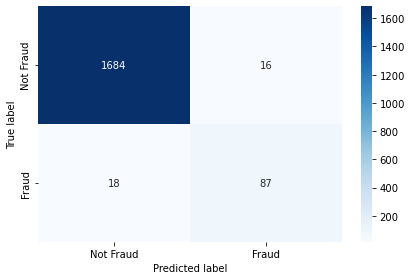

c:\Users\student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


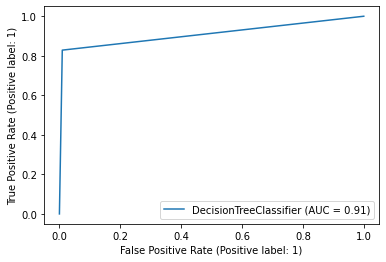

In [64]:
### ToDO:
## 3 points
## Evaluate Decision Tree Model for classification
## using classification_report()
## using plot_confusionmatrix
## Using plot_roc_curve
from sklearn.metrics import plot_roc_curve 
print(classification_report(y_test, tree_ypred, target_names=classes))
plot_confusionmatrix(tree_ypred,y_test,dom='Test',classes=classes)
plot_roc_curve(tree_model,X_test,y_test)


              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99      1700
       Fraud       1.00      0.82      0.90       105

    accuracy                           0.99      1805
   macro avg       0.99      0.91      0.95      1805
weighted avg       0.99      0.99      0.99      1805

Test Confusion matrix


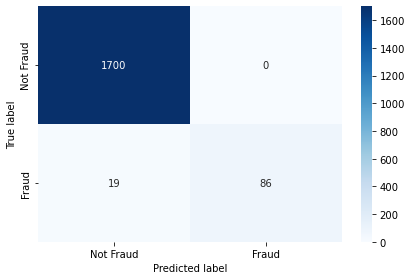

c:\Users\student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


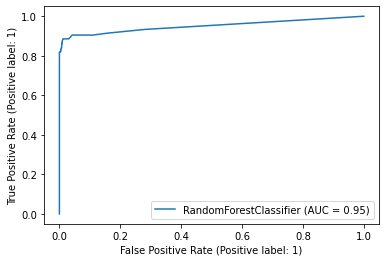

In [65]:
### ToDO:
## 3 points
## Evaluate Random Forest Model for classification
## using classification_report()
## using plot_confusionmatrix
## Using plot_roc_curve
print(classification_report(y_test, rf_ypred, target_names=classes))
plot_confusionmatrix(rf_ypred,y_test,dom='Test',classes=classes)
plot_roc_curve(rf,X_test,y_test)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99      1700
       Fraud       0.94      0.83      0.88       105

    accuracy                           0.99      1805
   macro avg       0.96      0.91      0.94      1805
weighted avg       0.99      0.99      0.99      1805

Test Confusion matrix


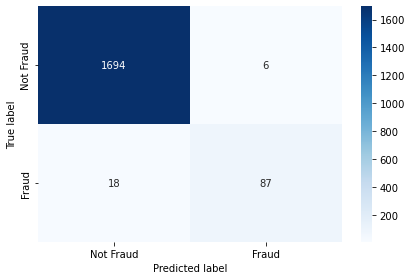

c:\Users\student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


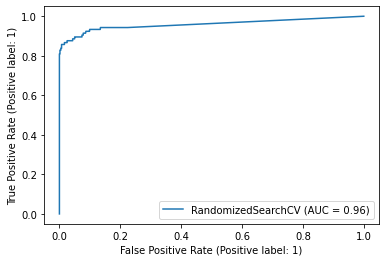

In [66]:
### Fine-Tune Random Forest
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

class_weight=dict({0:1,1:100})

np.random.seed(42)

## ToDO:
## 6 points
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(class_weight=class_weight), 
                           param_distributions=rf_grid,
                           cv=2,
                           n_iter=2,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

# Make predictions with tuned model
rfy_test_pred = rs_rf.predict(X_test)

# Evaluate the randomized search RandomForestClassifier model
print(classification_report(y_test, rfy_test_pred, target_names=classes))
plot_confusionmatrix(rfy_test_pred,y_test,dom='Test',classes=classes)
plot_roc_curve(rs_rf,X_test,y_test)



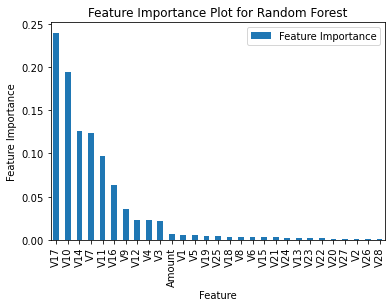

In [67]:
## ToDo: 5 points
## Use the best model from the cross-validation process 
## to fit the training data and 
## create Feature Importance Plot
features = ["V1","V2","V3","V4","V5", "V6", "V7", "V8",
"V9","V10","V11","V12","V13", "V14",
"V15", "V16","V17","V18","V19","V20",
"V21", "V22", "V23", "V24", "V25", "V26",
"V27","V28","Amount"]

bestParams = rs_rf.best_params_
rs_rfbest = RandomForestClassifier(**bestParams)
rs_rfbest.fit(X_train, y_train)
rfy_test_pred = rs_rfbest.predict(X_test)

#print(rs_rfbest.feature_importances_)

featImp = pd.DataFrame({'Feature':features,'Feature Importance': rs_rfbest.feature_importances_})

featImp.sort_values('Feature Importance', ascending=False, inplace=True)
featImp.plot.bar(x = 'Feature', y = 'Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot for Random Forest')
plt.show()



In [50]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


The number of classes before fit Counter({0: 6829, 1: 387})
The number of classes after fit Counter({0: 6829, 1: 5121})
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1700
           1       0.99      0.84      0.91       105

    accuracy                           0.99      1805
   macro avg       0.99      0.92      0.95      1805
weighted avg       0.99      0.99      0.99      1805

Test Confusion matrix


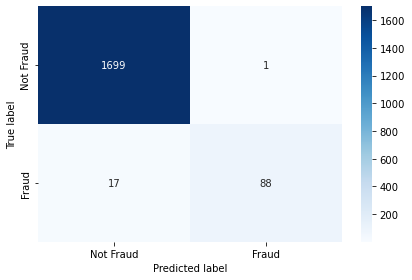

c:\Users\student\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


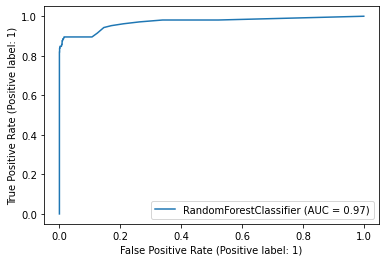

In [71]:
## Fit a Random Forest with SMOTE method to deal with
## imbalanced dataset
## SMOTE technique with random forest
from imblearn.over_sampling import SMOTE
from collections import Counter
os=SMOTE(sampling_strategy=0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

rfs_ypred=classifier.predict(X_test)
print(classification_report(y_test, rfs_ypred))
plot_confusionmatrix(rfs_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(classifier, X_test, y_test)